In [13]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import *
import numpy.random as random
from scipy.stats import *
from scipy.optimize import leastsq
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# Plots
Script to create the plots in the report for the case where all independent variables are simulated
to estimate constants $D_i$

In [14]:
data = read_csv('Data_MOBETa.csv',sep=';')
species = ['Billinga','Tali','Eveuss','Okan','Massaranduba','Greenheart']

random.seed(10)

for i in species: 
    nmetKR = len(data.KR[(data.KR>0)&(data.Species==i)])
    a = data.KR[(data.KR==0)&(data.Species==i)]
    remove_n = len(a) - nmetKR
    drop_indices = random.choice(data.index[(data.KR==0)&(data.Species==i)], remove_n, replace=False)
    data = data.drop(drop_indices)

def faKRmod(rho,KR,MOEaKR,D1,D2,D3,D4,D5):
    f = (( rho*MOEaKR*(1-D3*KR) ) / ( D1*rho*(1-D4*KR) + D2*MOEaKR )) + D5
    return f

def errormod(rho,KR,MOE,D1,D2,D3,D4,X1,X2,vF,vM):
    error = (X2*vF*sqrt(1-r**2) * (1-D3*KR)*rho*MOE ) / (D1*rho*(1-D4*KR) + D2*MOE)
    return error

def stdmod(rho,KR,MOE,D1,D2,D3,D4,vF):
    std = (vF*sqrt(1-r**2) * (1-D3*KR)*rho*MOE ) / (D1*rho*(1-D4*KR) + D2*MOE)
    return std

In [15]:
## Total
D1 = 402.99
D2 = -5.95
D3 = 0.88
D4 = 0.26
D5 = 1.34
print (D1,D2,D3,D4,D5)

402.99 -5.95 0.88 0.26 1.34


r^2 =  0.6612515085910584


D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


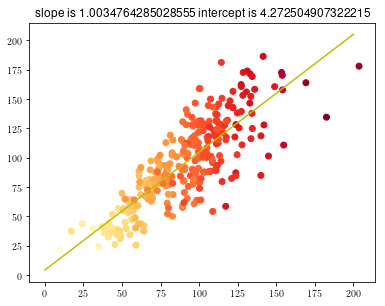

In [16]:
btot = data.alpha
x1tot = data.rho12
x2tot = data.KR
x3tot = data.Edyn12
ytot = data.fm12

xtot = faKRmod(x1tot,x2tot,x3tot,D1,D2,D3,D4,D5)
slopetot, intercepttot, r_valuetot, p_value, std_err = linregress(xtot,ytot)
print ("r^2 = ",r_valuetot**2)
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.4,0.9])
ax1.set_title("slope is "+str(slopetot)+"  intercept is "+str(intercepttot))
s1 = ax1.scatter(xtot,ytot,c=x3tot,cmap='YlOrRd',edgecolor='face')
s2 = ax1.plot(reeks,reeks*slopetot+intercepttot,'y')

plt.show()

2.024913847450001e-16 -2.6841458095383007e-14
r^2 =  0.6612515085910584


D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


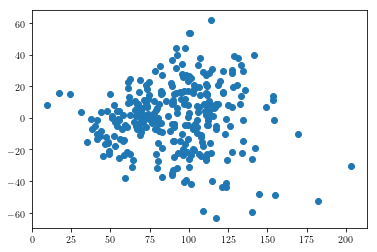

In [17]:
error = ytot - (slopetot*xtot+intercepttot)
plt.scatter(xtot,error)
slopeerr,intercepterr,rerr,perr,stderrerr = linregress(xtot,error)
print (slopeerr,intercepterr)

print ("r^2 = ",r_valuetot**2)
# savetxt('errDsim2',error)

Text(-20,-80,'$\\,y\\,=\\,0$')

D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


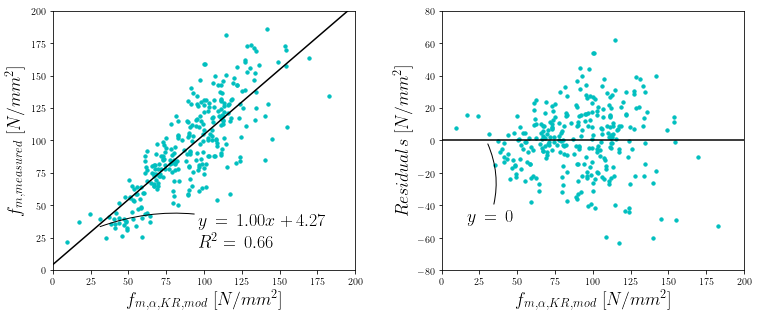

In [18]:
reeks = np.linspace(0,350,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$f_{m,measured}$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
ax1.set_xlim(0,200)
ax1.set_ylim(0,200)
s1 = ax1.scatter(xtot,ytot,color='c',edgecolor='face',s=11)
s2 = ax1.plot(reeks,reeks*slopetot+intercepttot,'k')
annotation_string = r"""$\,y\,=\,1.00x+4.27$
$R^2=\,0.66$"""
plt.annotate(annotation_string,
             xy=(30,33), xycoords='data',
             xytext=(100,-20), textcoords='offset points', fontsize=18,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))

ax2 = fig.add_axes([0.5,0.05,0.35,0.9])
ax2.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax2.xaxis.label.set_fontsize(18)
ax2.set_ylabel(r'$Residuals$  $[N/mm^2]$')
ax2.yaxis.label.set_fontsize(18)
ax2.set_xlim(0,200)
ax2.set_ylim(-80,80)
s3 = ax2.scatter(xtot,error,color='c',edgecolor='face',s=11)
s4 = ax2.plot(reeks,reeks*slopeerr+intercepterr,'k')
annotation_string = r"""$\,y\,=\,0$"""
plt.annotate(annotation_string,
             xy=(30,-1), xycoords='data',
             xytext=(-20,-80), textcoords='offset points', fontsize=18,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))
# plt.savefig('Dfromsim2'+'.eps', bbox_inches='tight')

In [19]:
btot = data.alpha
x1tot = data.rho12
x2tot = data.KR
x3tot = data.Edyn12
ytot = data.fm12

# for i in range(len(X1)):
#     while (X1[i]<-2) | (X1[i]>2):
#         X1[i] = np.random.standard_normal(1)
# for i in range(len(X2)):
#     while (X2[i]<-2) | (X2[i]>2):
#         X2[i] = np.random.standard_normal(1)
# plt.scatter(xtot,errorpred,color='y')
# plt.scatter(xtot,error,color='g')    

vF = 0.39
vM = 0.24
r = 0.87

Hstatistic = []
pvalue = []
for i in range(10000):
    X1=np.random.standard_normal(len(x1tot))
    X2=np.random.standard_normal(len(x1tot))
    errorpred = errormod(x1tot,x2tot,x3tot,D1,D2,D3,D4,X1,X2,vF,vM)
    Hstatistic.append(kruskal(error,errorpred)[0])
    pvalue.append(kruskal(error,errorpred)[1])
    
print (mean(Hstatistic))
print (mean(pvalue))



0.5310034741528318
0.597374960654425


In [20]:
plevene = []
for i in range(10000):
    X1=np.random.standard_normal(len(x1tot))
    X2=np.random.standard_normal(len(x1tot))
    errorpred = errormod(x1tot,x2tot,x3tot,D1,D2,D3,D4,X1,X2,vF,vM)
    plevene.append(levene(error,errorpred)[1])
print (mean(plevene))

0.04831156188204968


LeveneResult(statistic=4.149432513937116, pvalue=0.04210673794524045)
KruskalResult(statistic=0.2562847523106484, pvalue=0.6126841466431022)
BartlettResult(statistic=3.1480243514331927, pvalue=0.07601895143618098)


D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


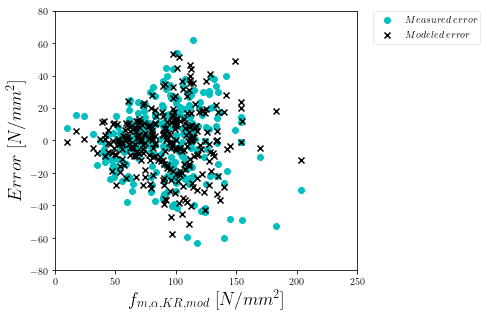

In [21]:
reeks = np.linspace(0,250,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$Error$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
ax1.set_xlim(0,250)
ax1.set_ylim(-80,80)
s1 = ax1.scatter(xtot,error,color='c',edgecolor='face',label='$Measured$ $error$')
s2 = ax1.scatter(xtot,errorpred,color='k',marker='x',label='$Modeled$ $error$')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
lgd.get_frame().set_linewidth(0.5)
print (levene(error,errorpred,center='mean'))
print (kruskal(error,errorpred))
print (bartlett(error,errorpred))
# The tests give rather varying results, so visual inspection is used to determine that the distributions are rather similar

# plt.savefig('errDsim2'+'.eps', bbox_inches='tight')

In [22]:
xadj = xtot*slopetot + intercepttot
slopeadj, interceptadj, r_valueadj, p_valueadj, std_erradj = linregress(xadj,ytot)

vF = 0.39
vM = 0.24
r = 0.87

X1 = np.random.standard_normal(len(x1tot))
X2 = np.random.standard_normal(len(x1tot))
errorpred = errormod(x1tot,x2tot,x3tot,D1,D2,D3,D4,X1,X2,vF,vM)
stdpred = stdmod(x1tot,x2tot,x3tot,D1,D2,D3,D4,vF)
slopestd,interceptstd,rstd,pstd,stderrstd = linregress(xtot,stdpred)
print (slopestd,interceptstd)

0.19229017135568838 -0.2576688296166232


mean =  95.71964119899306    std =  29.120888602807018
p=0.66 D=0.04


D:\Programs\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(154,0.0125,'$p = 0.66$')

D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


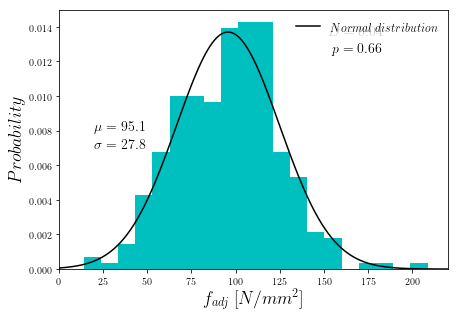

In [23]:
X = xadj
param_norm = norm.fit(X,loc=0,scale=1)
print ("mean = ", param_norm[0], "   std = ",param_norm[1])
Dnorm,pnorm = kstest(X,'norm',param_norm)
x1 = linspace(0,X.max()*1.2,1000)
norm_pdf = norm.pdf(x1,param_norm[0],param_norm[1])
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
ax.plot(x1,norm_pdf,'b',label="$Normal$ $distribution$", color='k')
print ("p="+format(pnorm,'.2f')+" D="+format(Dnorm,'.2f'))
ax.hist(X,normed=True,bins=20,color='c')
ax.set_xlabel(r'$f_{adj}$  $[N/mm^2]$')
ax.set_ylabel(r'$Probability$')
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xlim(0,220)
lgd = plt.legend(loc=0, borderaxespad=0.5,fontsize = 12)
lgd.get_frame().set_linewidth(0)
ax.text(20,0.008,r'$\mu = 95.1$',fontsize=14)
ax.text(20,0.007,r'$\sigma = 27.8$',fontsize=14)
ax.text(152,0.0135,r'$D = 0.04$', fontsize = 14)
ax.text(154,0.0125,r'$p = 0.66$', fontsize = 14)
# plt.savefig('KSDsim2'+'.eps',bbox_inches='tight')

Text(140,0.005,'$\\sigma = 27.8$')

D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


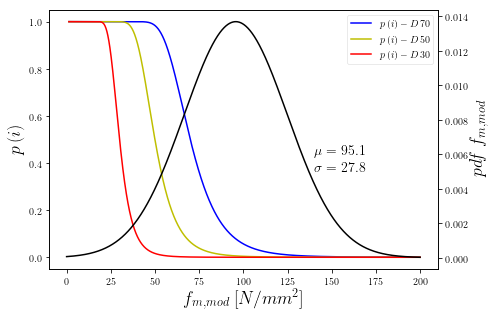

In [24]:
x = linspace(0.05,199.95,2000)
fmstat = slopeadj*x + interceptadj
se = fmstat*slopestd + interceptstd
IP = norm.pdf(x,loc=mean(xadj),scale=std(xadj))
fm0570 = 70.*ones(len(x))
fm0550 = 50.*ones(len(x))
fm0530 = 30.*ones(len(x))
p_i70 = norm.cdf(70,loc=fmstat,scale=se)
p_i50 = norm.cdf(50,loc=fmstat,scale=se)
p_i30 = norm.cdf(30,loc=fmstat,scale=se)

fig = plt.figure()
ax1 = fig.add_axes([0.05,0.05,0.9,0.9])
ax1.plot(x,p_i70,'b',label=r'$p\,(i) - D\,70$')
ax1.plot(x,p_i50,'y',label=r'$p\,(i) - D\,50$')
ax1.plot(x,p_i30,'r',label=r'$p\,(i) - D\,30$')
ax1.set_xlabel(r'$f_{m,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$p\,(i)$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
lgd = plt.legend(loc=0, borderaxespad=0.5)
lgd.get_frame().set_linewidth(0.5)

ax2 = ax1.twinx()
ax2.plot(x,IP,'k')
ax2.set_ylabel(r'$pd\!f$ $f_{m,mod}$')
ax2.yaxis.label.set_fontsize(18)
ax2.text(140,0.006,r'$\mu = 95.1$',fontsize=14)
ax2.text(140,0.005,r'$\sigma = 27.8$',fontsize=14)

# plt.savefig('pi_met_pdffmod'+'.eps',bbox_inches='tight')

p_char70 =  0.049831350837119634   pi70low =  0.19134695679593133   pi70high =  0.00033367083835320293   IP70low =  83.85000000000001   IP50high =  83.75
837


D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


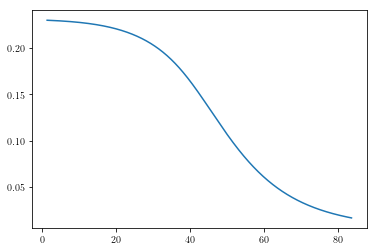

In [25]:
pchar70 = ones(len(x))
for i in range(len(pchar70)):
    pchar70[i] = sum(p_i70[i:]*IP[i:]) / sum(IP[i:])

for i in range(len(pchar70)):
    if pchar70[i]<0.05:
        p_char70 = pchar70[i]
        pi70low = p_i70[i]
        pi70high = p_i70[-1]
        IP70low = fmstat[i]
        IP50high = fmstat[i-1]
        einde = i-1
        print ("p_char70 = ",p_char70, "  pi70low = ",pi70low,"  pi70high = ",pi70high,"  IP70low = ",IP70low,"  IP50high = ",IP50high)
        print (einde)
        break

pchar50 = ones(len(range(einde)))
for i in range(len(pchar50)):
    pchar50[i] = sum(p_i50[i:einde]*IP[i:einde]) / sum(IP[i:einde])

plt.plot(x[0:einde],pchar50)

In [26]:
for i in range(len(pchar50)):
    if pchar50[i]<0.05:
        p_char50 = pchar50[i]
        pi50low = p_i50[i]
        pi50high = p_i50[-1]
        IP50low = fmstat[i]
        IP30high = fmstat[i-1]
        einde2 = i-1
        print ("p_char50 = ",p_char50, "  pi50low = ",pi50low,"  pi50high = ",pi50high,"  IP50low = ",IP50low,"  IP30high = ",IP30high)
        print (einde2)
        break
        
pchar30 = ones(len(range(einde2)))
for i in range(len(pchar30)):
    pchar30[i] = sum(p_i30[i:einde2]*IP[i:einde2]) / sum(IP[i:einde2])

for i in range(len(pchar30)):
    if pchar30[i]<0.05:
        p_char30 = pchar30[i]
        pi30low = p_i30[i]
        pi30high = p_i30[-1]
        IP30low = fmstat[i]
        print ("p_char30 = ",p_char30, "  pi30low = ",pi30low,"  pi30high = ",pi30high,"  IP30low = ",IP30low)
        break

p_char50 =  0.04982047939255562   pi50low =  0.1314423706253826   pi50high =  4.312351324027768e-05   IP50low =  63.35000000000001   IP30high =  63.25000000000001
632
p_char30 =  0.049956965767113636   pi30low =  0.6168943728372008   pi30high =  4.292908147718605e-06   IP30low =  28.450000000000014


In [27]:
yD70 = len(xadj[xadj>=IP70low]) / float(len(xadj))
yD50 = len(xadj[(xadj>=IP50low)&(xadj<=IP50high)]) / float(len(xadj))
yD30 = len(xadj[(xadj>=IP30low)&(xadj<=IP30high)]) / float(len(xadj))

print ("Percentages voor D70, D50 en D30 zijn: ",100*yD70,100*yD50,100*yD30)
print ("Weggooien: ",(1-(yD70+yD50+yD30))*100)

print ("Fractile D70 onder 70 = ",len(data.fm12[(data.fm12<70)&(xadj>IP70low)]) / float(len(data.fm12[(xadj>IP70low)])))

print ("Fractile D50 onder 50 = ",len(data.fm12[(data.fm12<50)&(xadj<=IP50high)&(xadj>=IP50low)]) / float(len(data.fm12[(xadj<=IP50high)&(xadj>=IP50low)])))
print (len(data.fm12[(data.fm12<50)&(xadj<=IP50high)&(xadj>=IP50low)]))
print ("Fractile D30 onder 30 = ",len(data.fm12[(data.fm12<30)&(xadj<=IP30high)&(xadj>=IP30low)]) / float(len(data.fm12[(xadj<=IP30high)&(xadj>=IP30low)])))

Percentages voor D70, D50 en D30 zijn:  64.93055555555556 20.48611111111111 13.194444444444445
Weggooien:  1.388888888888884
Fractile D70 onder 70 =  0.0748663101604278
Fractile D50 onder 50 =  0.0847457627118644
5
Fractile D30 onder 30 =  0.05263157894736842


In [28]:
predD70 = (1-norm.cdf(IP50high,loc=mean(xadj),scale=std(xadj)))*100
predD50 = (norm.cdf(IP50high,loc=mean(xadj),scale=std(xadj)) - norm.cdf(IP50low,loc=mean(xadj),scale=std(xadj)))*100
predD30 = (norm.cdf(IP30high,loc=mean(xadj),scale=std(xadj)) - norm.cdf(IP30low,loc=mean(xadj),scale=std(xadj)))*100

print ("Predicted yield D70 = ",predD70)
print ("Predicted yield D50 = ",predD50)
print ("Predicted yield D30 = ",predD30)
print ("Rejected = ", 100-(predD70 + predD50 + predD30))

Predicted yield D70 =  65.9475768368656
Predicted yield D50 =  20.736073612626555
Predicted yield D30 =  12.198260378453416
Rejected =  1.1180891720544395


<Figure size 432x288 with 0 Axes>

D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


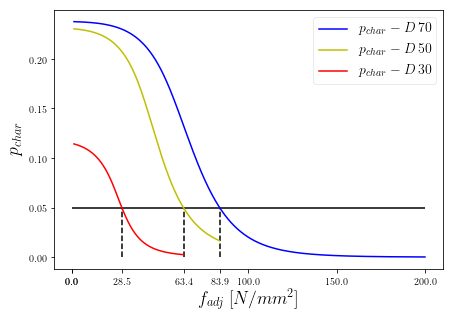

In [29]:
# plt.figure()
# plt.plot(x[0:einde2],p_i30[0:einde2],'y')
# plt.plot(x[einde2:einde],p_i50[einde2:einde],'g')
# plt.plot(x[einde:],p_i70[einde:],'b')
plt.figure()
fig = plt.figure()
ax1 = fig.add_axes([0.05,0.05,0.9,0.9])
ax1.plot(x,pchar70,'b',label=r'$p_{char} - D\,70$')
ax1.plot(x[0:einde],pchar50,'y',label=r'$p_{char} - D\,50$')
ax1.plot(x[0:einde2],pchar30,'r',label=r'$p_{char} - D\,30$')
ax1.hlines(0.05,0,200)
ax1.set_ylabel('p char value')
ax1.set_xlabel('f adjusted')
ax1.vlines(IP70low,0,0.05,linestyle='--')
ax1.vlines(IP50low,0,0.05,linestyle='--')
ax1.vlines(IP30low,0,0.05,linestyle='--')
ax1.set_xticks([0,IP30low,float(),IP50low,IP70low,100,150,200])
ax1.set_xlabel(r'$f_{adj}$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.set_ylabel(r'$p_{char}$')
ax1.yaxis.label.set_fontsize(18)
lgd = plt.legend(loc=0, borderaxespad=0.5,fontsize=14)
lgd.get_frame().set_linewidth(0.5)
# plt.savefig('pcharDuitsim2'+'.eps',bbox_inches='tight')
plt.show();

D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


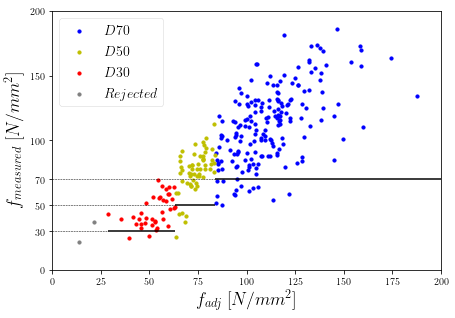

In [30]:
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
s1 = ax.scatter(xadj[xadj>=IP70low],data.fm12[xadj>=IP70low],color='b',s=10,label=r'$D70$')
s2 = ax.scatter(xadj[(xadj>=IP50low)&(xadj<=IP50high)],data.fm12[(xadj>=IP50low)&(xadj<=IP50high)],color='y',s=10,label=r'$D50$')
s3 = ax.scatter(xadj[(xadj>=IP30low)&(xadj<=IP30high)],data.fm12[(xadj>=IP30low)&(xadj<=IP30high)],color='r',s=10,label=r'$D30$')
s4 = ax.scatter(xadj[xadj<IP30low],data.fm12[xadj<IP30low],color='Grey',s=10,label=r'$Rejected$')
ax.set_xlim(0,200)
ax.set_ylim(0,200)
ax.hlines(70,IP70low,200)
ax.hlines(50,IP50low,IP50high)
ax.hlines(30,IP30low,IP30high)
ax.hlines(70,0,IP70low,lw=0.5,linestyle='--')
ax.hlines(50,0,IP50low,lw=0.5,linestyle='--')
ax.hlines(30,0,IP30low,lw=0.5,linestyle='--')
ax.set_yticks([0,30,50,70,100,150,200])

ax.set_xlabel(r'$f_{adj}$  $[N/mm^2]$')
ax.set_ylabel(r'$f_{measured}$  $[N/mm^2]$')
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
lgd = plt.legend(loc=2, borderaxespad=0.5,fontsize=14)
lgd.get_frame().set_linewidth(0.5)

# plt.savefig('gradedDsim2'+'.eps',bbox_inches='tight')

Text(150,0.01,'$\\sigma = 27.8$')

D:\Programs\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


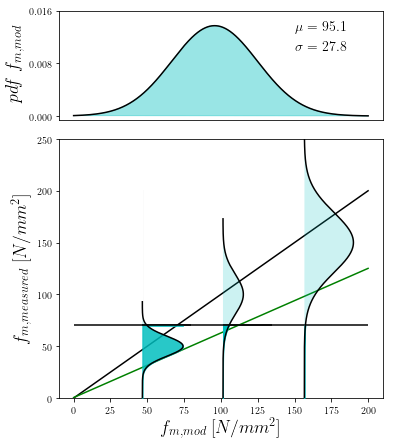

In [31]:
fig = plt.figure(figsize=(5,6))
ax1 = fig.add_axes([0.05,0.05,0.9,0.6])
ax1.plot(x,fmstat, 'k')
ax1.plot(x,x-1.96*se,'g')
ax1.set_ylim(0,250)
ax1.set_yticks([0,50,100,150,200,250])
ax1.set_xlabel(r'$f_{m,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$f_{m,measured}$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)

xa = linspace(0.05,249.95,2500)
ax2 = fig.add_axes([0.75*0.9+0.05,0.05,0.15,0.6])
ax2.fill(norm.pdf(xa,x[1500],x[1500]*vF*sqrt(1-r**2)),xa,'c',alpha=0.2)
ax2.fill_between(norm.pdf(x,x[1500],x[1500]*vF*sqrt(1-r**2)),x,70,where=x<70,color='c')
ax2.plot(norm.pdf(xa,x[1500],x[1500]*vF*sqrt(1-r**2)),xa,'k')
ax2.set_ylim(0,250)
ax2.axis('off')

ax3 = fig.add_axes([0.5*0.9+0.049,0.05,0.15,0.6])
ax3.fill(norm.pdf(x,x[1000],x[1000]*vF*sqrt(1-r**2)),x,'c',alpha=0.2)
ax3.fill_between(norm.pdf(x,x[1000],x[1000]*vF*sqrt(1-r**2)),x,70,where=x<=70,color='c')
ax3.plot(norm.pdf(x,x[1000],x[1000]*vF*sqrt(1-r**2)),x,'k')
ax3.plot(norm.pdf(x[1750:2000],x[1000],x[1000]*vF*sqrt(1-r**2)),x[1750:2000],'w',lw=3)
ax3.set_ylim(0,250)
ax3.hlines(70,0,0.05)
ax3.axis('off')

ax4 = fig.add_axes([0.25*0.9+0.05,0.05,0.15,0.6])
ax4.fill(norm.pdf(x,x[500],x[500]*vF*sqrt(1-r**2)),x,'c',alpha=0.2)
ax4.fill_between(norm.pdf(x,x[500],x[500]*vF*sqrt(1-r**2)),x,70,where=x<=70,color='c',interpolate=True,alpha=0.8)
ax4.plot(norm.pdf(x,x[500],x[500]*vF*sqrt(1-r**2)),x,'k')
ax4.plot(norm.pdf(x[950:2000],x[500],x[500]*vF*sqrt(1-r**2)),x[950:2000],'w',lw=3)
ax4.set_ylim(0,250)
ax4.hlines(70,0,0.05)
ax4.axis('off')

ax1.hlines(70,0,200)

ax6 = fig.add_axes([0.05,5./7.*0.9+0.05,0.9,1.78/7.])
ax6.fill(x,norm.pdf(x,loc=mean(xadj),scale=std(xadj)),color='c',alpha=0.4)
ax6.plot(x,norm.pdf(x,loc=mean(xadj),scale=std(xadj)),color='k')
ax6.set_ylabel(r'$pdf$ $f_{m,mod}$')
ax6.yaxis.label.set_fontsize(18)
ax6.set_xticks([])
ax6.set_yticks([0,0.008,0.016])
ax6.text(150,0.013,r'$\mu = 95.1$',fontsize=14)
ax6.text(150,0.010,r'$\sigma = 27.8$',fontsize=14)

#plt.savefig('UitlegGrading'+'.pdf', bbox_inches='tight')